
# 🧬 CytoIntel  
## AI-Powered Breast Cancer Classification System  
### Author: Mojtaba Pipelzadeh  

---
## 🚀 Project Overview
CytoIntel is a personalized AI system designed to classify breast cancer tumors
as Benign or Malignant using Support Vector Machines (SVM).



## 🎯 Objective
Build an accurate and interpretable ML model to assist early cancer detection.


In [1]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import classification_report, confusion_matrix

sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (10, 6)


In [2]:

# Load Dataset
df = pd.read_csv("cell_samples.csv")
df.head()


,ID,Clump,UnifSize,UnifShape,MargAdh,SingEpiSize,BareNuc,BlandChrom,NormNucl,Mit,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


In [3]:

# Data Cleaning
df = df[pd.to_numeric(df['BareNuc'], errors='coerce').notnull()]
df['BareNuc'] = df['BareNuc'].astype('int')

df['Class'].value_counts()


Class
2    444
4    239
Name: count, dtype: int64

In [4]:

# Feature Selection
feature_df = df[['Clump','UnifSize','UnifShape','MargAdh',
                 'SingEpiSize','BareNuc','BlandChrom','NormNucl','Mit']]

X = np.asarray(feature_df)
y = np.asarray(df['Class'])

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [5]:

# Train Model
model = svm.SVC(kernel='rbf')
model.fit(X_train, y_train)

y_pred = model.predict(X_test)


              precision    recall  f1-score   support

           2       0.94      0.97      0.96        79
           4       0.96      0.91      0.94        58

    accuracy                           0.95       137
   macro avg       0.95      0.94      0.95       137
weighted avg       0.95      0.95      0.95       137



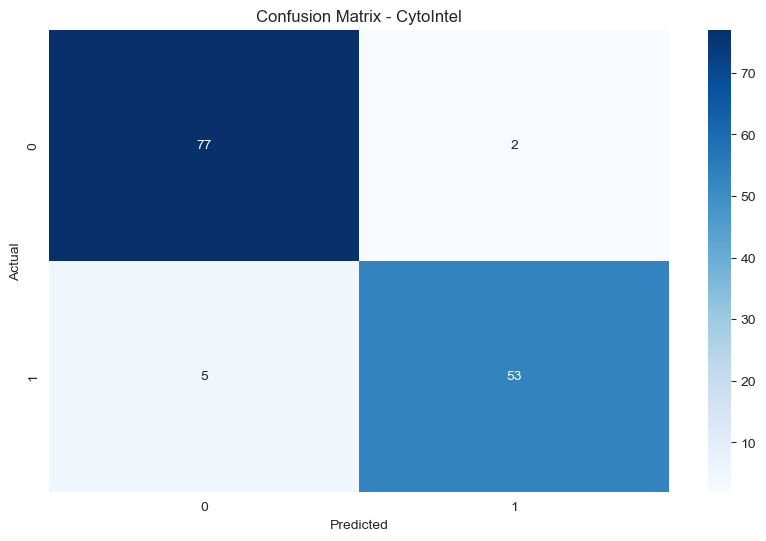

In [6]:

# Evaluation
print(classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)

sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix - CytoIntel")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()



## 🔮 Future Improvements
- Hyperparameter tuning
- Cross validation
- API deployment
- Medical dashboard integration

---
GitHub: https://github.com/mojipipel/CytoIntel
